# AirfoilSelfNoise Dataset

**This data was provided by NASA for predicitng the sound pressure level of Airfoil blade sections.**

**The features of the dataset are:** <br>

1. Frequency, in Hertzs.
2. Angle of attack, in degrees.
3. Chord length, in meters.
4. Free-stream velocity, in meters per second.
5. Suction side displacement thickness, in meters.

The target is:
6. Scaled sound pressure level, in decibels.

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score 
from sklearn import metrics
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression


import warnings
warnings.filterwarnings("ignore")

In [86]:
df = pd.read_csv('AirfoilSelfNoise.csv')
df.shape

(1503, 6)

# Data Exploration and Cleaning

In [87]:
df.head(5)

,f,alpha,c,U_infinity,delta,SSPL
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [88]:
df.dtypes

f               int64
alpha         float64
c             float64
U_infinity    float64
delta         float64
SSPL          float64
dtype: object

In [89]:
df.describe()

,f,alpha,c,U_infinity,delta,SSPL
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [90]:
df.isnull().sum()

f             0
alpha         0
c             0
U_infinity    0
delta         0
SSPL          0
dtype: int64

In [91]:
df.duplicated().sum()

0

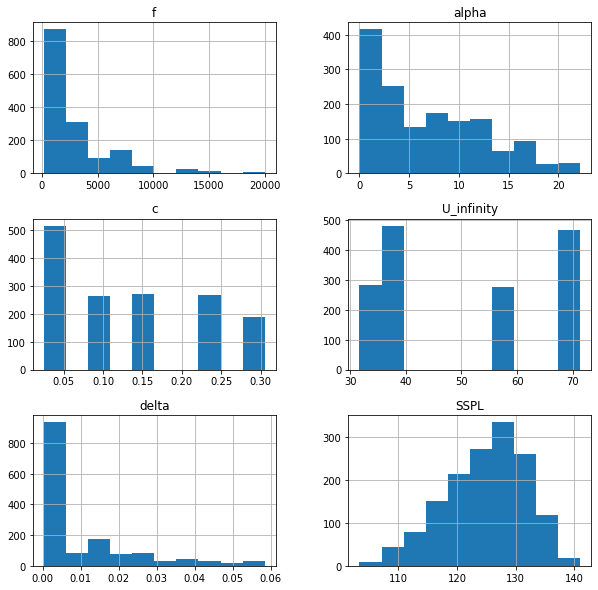

In [92]:
#checking the distribution of the data
df.hist(figsize=(10, 10))
plt.show()

[]

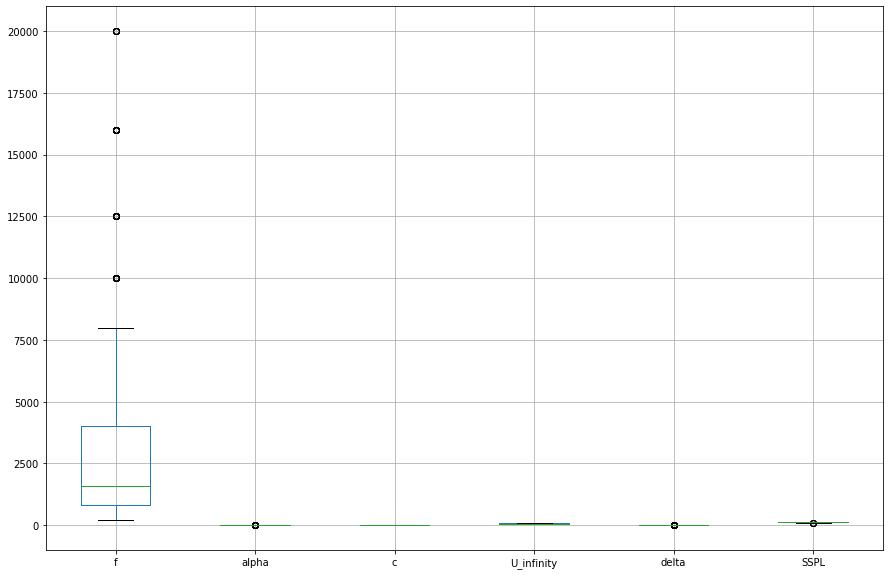

In [93]:
#checking for outliers
df.boxplot(return_type='dict',figsize=(15,10))
plt.plot()


In [94]:
#removing outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR=Q3-Q1
df1 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df.shape[0] - df1.shape[0]) #Outliers
print(df1.shape) #new dataset without Outliers

240
(1263, 6)


[]

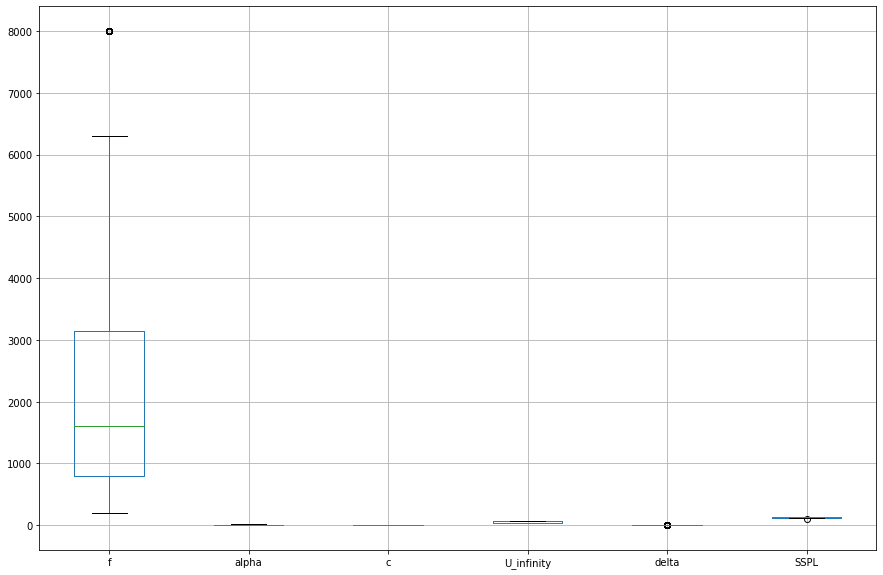

In [95]:
#checking after removing
df1.boxplot(return_type='dict',figsize=(15,10))
plt.plot()

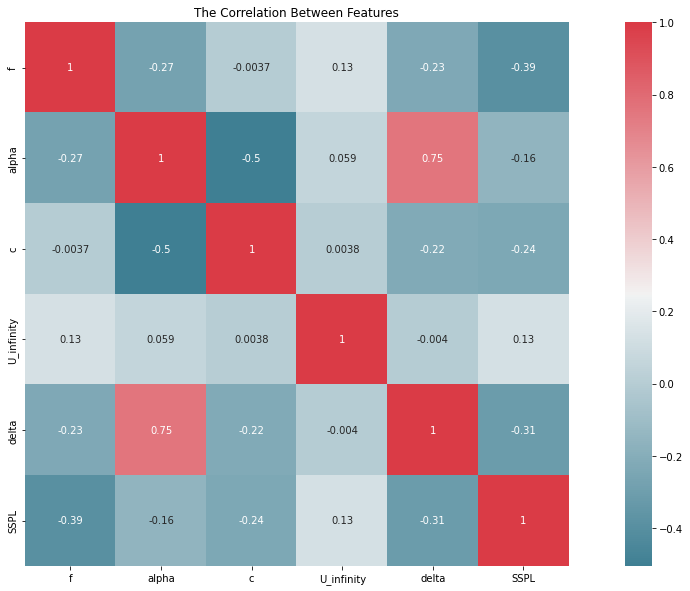

In [96]:
#checking the correlation between features
f, ax = plt.subplots(figsize=(20, 10))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), annot = True, square=True, ax=ax)
plt.title('The Correlation Between Features')
plt.show()

# Feature Selection

In [97]:
X = df1.iloc[:,0:-1]
y = df1["SSPL"]

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [99]:
#performing feature selection using SFS

lr=LinearRegression()
sfs=SequentialFeatureSelector(lr,n_features_to_select=0.7)
sfs.fit(X_train,y_train)
sfs.get_support()

array([ True, False,  True, False,  True])

In [100]:
df2=df1[['f','c','delta', 'SSPL']]
df2.head()

,f,c,delta,SSPL
0,800,0.3048,0.002663,126.201
1,1000,0.3048,0.002663,125.201
2,1250,0.3048,0.002663,125.951
3,1600,0.3048,0.002663,127.591
4,2000,0.3048,0.002663,127.461


# Modelling

**The regression algorithms we'll be using are:** <br> 
<li> Decision Tree Regressor</li>
<li> Linear Regression</li>
<li> K-nearest neighbors Regressor</li> <br>

**For each model, we'll train it twice, once before feature selection, and once after it. To compare and see if the feature selection has improved the models.**

In [101]:
def plot_learning_curve(model, x, y):
  train_sizes, train_scores, test_scores = learning_curve(model, x, y, cv=5, scoring='neg_root_mean_squared_error')

  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)
  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)
  
  plt.subplots(1, figsize=(5,5))
  plt.plot(train_sizes, train_mean, color="b",  label="Training score")
  plt.plot(train_sizes, test_mean, color="r", label="Cross-validation score")

  plt.title("Learning Curve")
  plt.xlabel("Training Set Size"), plt.ylabel("Error"), plt.legend(loc="best")
  plt.tight_layout()
  plt.show()

In [102]:
X1 = df2.iloc[:,0:-1]
y1 = df2["SSPL"]

print(X1.shape,y1.shape)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y1,test_size=0.4, random_state=42)

(1263, 3) (1263,)


In [103]:
x_scaler = StandardScaler()

x_train = x_scaler.fit_transform(X_train)
x_test = x_scaler.transform(X_test)

x_scaler = StandardScaler()

x_train1 = x_scaler.fit_transform(X_train_1)
x_test1 = x_scaler.transform(X_test_1)

# Linear Regression

**Before Feature Selection**

In [143]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
reg_y_pred = linear_reg.predict(X_test)

In [144]:
print(f'The R2 Score is : ', r2_score(y_test, reg_y_pred))
print(f'The Mean Absolute Error is : ', mean_absolute_error(y_test, reg_y_pred))
print(f'The Mean Squared Error is : ', mean_squared_error(y_test, reg_y_pred))
print(f'The Root Mean Squared Error is : ', np.sqrt(mean_squared_error(y_test, reg_y_pred)))

The R2 Score is :  0.4734600850785211
The Mean Absolute Error is :  3.808352890633248
The Mean Squared Error is :  23.648982549809222
The Root Mean Squared Error is :  4.863021956541963


In [183]:
reg_error = np.sqrt(mean_squared_error(y_test, reg_y_pred))
reg_error

4.863021956541963

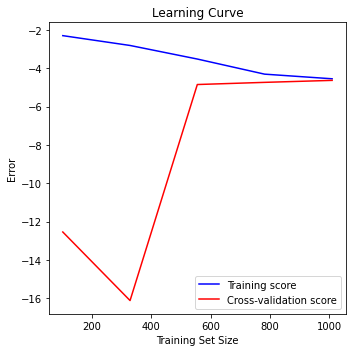

In [145]:
plot_learning_curve(linear_reg, X, y)

**After feature Selection**

In [147]:
linear_reg1 = LinearRegression()
linear_reg1.fit(X_train_1, y_train_1)
reg_y_pred1 = linear_reg1.predict(X_test_1)

In [148]:
print(f'The R2 Score is : ', r2_score(y_test_1, reg_y_pred1))
print(f'The Mean Absolute Error is : ', mean_absolute_error(y_test_1, reg_y_pred1))
print(f'The Mean Squared Error is : ', mean_squared_error(y_test_1, reg_y_pred1))
print(f'The Root Mean Squared Error is : ', np.sqrt(mean_squared_error(y_test_1, reg_y_pred1)))

The R2 Score is :  0.36516469976814303
The Mean Absolute Error is :  4.061742937938441
The Mean Squared Error is :  27.254606167275156
The Root Mean Squared Error is :  5.220594426621854


In [182]:
reg1_error = np.sqrt(mean_squared_error(y_test_1, reg_y_pred1))
reg1_error

5.220594426621854

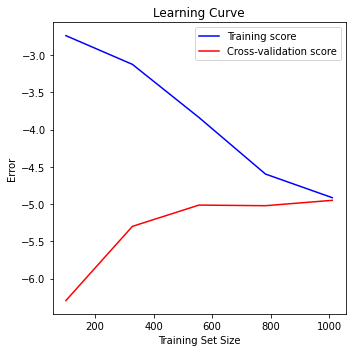

In [149]:
plot_learning_curve(linear_reg, X1, y1)

# Decision Tree Regressor

**Before Feature Selection**

In [150]:
TreeRegressor = DecisionTreeRegressor()
TreeRegressor.fit(X_train, y_train)
tree_y_pred = TreeRegressor.predict(X_test)

In [151]:
print(f'The R2 Score is : ', r2_score(y_test, tree_y_pred))
print(f'The Mean Absolute Error is : ', mean_absolute_error(y_test, tree_y_pred))
print(f'The Mean Squared Error is : ', mean_squared_error(y_test, tree_y_pred))
print(f'The Root Mean Squared Error is : ', np.sqrt(mean_squared_error(y_test, tree_y_pred)))

The R2 Score is :  0.8759326254394915
The Mean Absolute Error is :  1.7258575949367092
The Mean Squared Error is :  5.572354712025315
The Root Mean Squared Error is :  2.3605835532819666


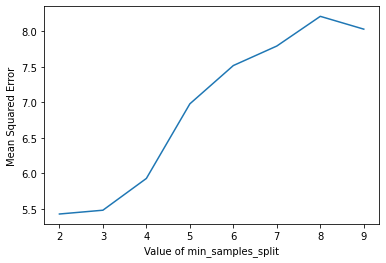

In [152]:
min_samples_split = range(2,10)
scores = []
for m in min_samples_split:
    TreeRegressor = DecisionTreeRegressor(min_samples_split=m)
    TreeRegressor.fit(X_train, y_train)
    tree_y_pred = TreeRegressor.predict(X_test)
    scores.append(metrics.mean_squared_error(y_test, tree_y_pred))
plt.plot(min_samples_split, scores)
plt.xlabel('Value of min_samples_split')
plt.ylabel('Mean Squared Error')
plt.show()


In [154]:
TreeRegressor = DecisionTreeRegressor(min_samples_split=3)
TreeRegressor.fit(X_train, y_train)
tree_y_pred = TreeRegressor.predict(X_test)

In [155]:
print(f'The R2 Score is : ', r2_score(y_test, tree_y_pred))
print(f'The Mean Absolute Error is : ', mean_absolute_error(y_test, tree_y_pred))
print(f'The Mean Squared Error is : ', mean_squared_error(y_test, tree_y_pred))
print(f'The Root Mean Squared Error is : ', np.sqrt(mean_squared_error(y_test, tree_y_pred)))

The R2 Score is :  0.8796274592096762
The Mean Absolute Error is :  1.7033876582278484
The Mean Squared Error is :  5.406405166930379
The Root Mean Squared Error is :  2.325167771781292


In [179]:
tree_error = np.sqrt(mean_squared_error(y_test, tree_y_pred))
tree_error

2.325167771781292

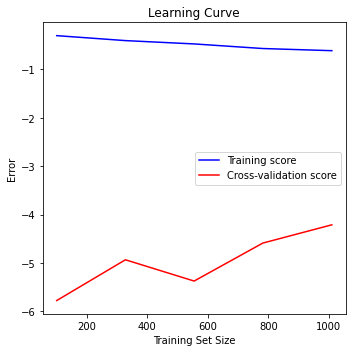

In [156]:
plot_learning_curve(TreeRegressor, X, y)

**After feature Selection**

In [158]:
TreeRegressor1 = DecisionTreeRegressor()
TreeRegressor1.fit(X_train_1, y_train_1)
tree_y_pred1 = TreeRegressor1.predict(X_test_1)

In [159]:
print(f'The R2 Score is : ', r2_score(y_test_1, tree_y_pred1))
print(f'The Mean Absolute Error is : ', mean_absolute_error(y_test_1, tree_y_pred1))
print(f'The Mean Squared Error is : ', mean_squared_error(y_test_1, tree_y_pred1))
print(f'The Root Mean Squared Error is : ', np.sqrt(mean_squared_error(y_test_1, tree_y_pred1)))

The R2 Score is :  0.8149695150733717
The Mean Absolute Error is :  1.9741798418972327
The Mean Squared Error is :  7.943687116600788
The Root Mean Squared Error is :  2.8184547391435593


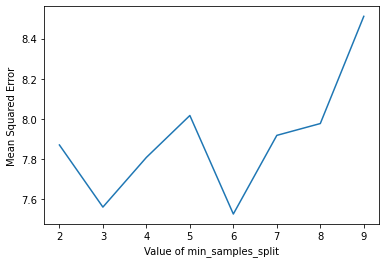

In [160]:
min_samples_split = range(2,10)
scores = []
for m in min_samples_split:
    TreeRegressor = DecisionTreeRegressor(min_samples_split=m)
    TreeRegressor.fit(X_train_1, y_train_1)
    tree_y_pred1 = TreeRegressor.predict(X_test_1)
    scores.append(metrics.mean_squared_error(y_test_1, tree_y_pred1))
plt.plot(min_samples_split, scores)
plt.xlabel('Value of min_samples_split')
plt.ylabel('Mean Squared Error')
plt.show()


In [161]:
TreeRegressor1 = DecisionTreeRegressor(min_samples_split = 6)
TreeRegressor1.fit(X_train_1, y_train_1)
tree_y_pred1 = TreeRegressor1.predict(X_test_1)

In [162]:
print(f'The R2 Score is : ', r2_score(y_test_1, tree_y_pred1))
print(f'The Mean Absolute Error is : ', mean_absolute_error(y_test_1, tree_y_pred1))
print(f'The Mean Squared Error is : ', mean_squared_error(y_test_1, tree_y_pred1))
print(f'The Root Mean Squared Error is : ', np.sqrt(mean_squared_error(y_test_1, tree_y_pred1)))

The R2 Score is :  0.8298218528105308
The Mean Absolute Error is :  2.039755731225296
The Mean Squared Error is :  7.306049897086077
The Root Mean Squared Error is :  2.7029705690380865


In [178]:
tree1_error =  np.sqrt(mean_squared_error(y_test_1, tree_y_pred1))
tree1_error

2.7029705690380865

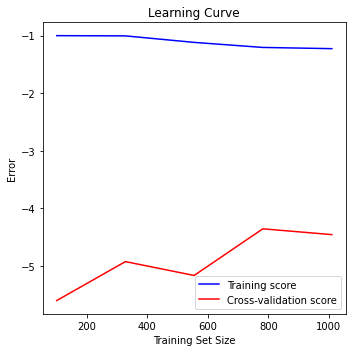

In [138]:
plot_learning_curve(TreeRegressor1, X1, y1)

# K-nearest neighbors Regressor

**Before Feature Selection**

In [164]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)

In [165]:
print(f'The R2 Score is : ', r2_score(y_test, knn_y_pred))
print(f'The Mean Absolute Error is : ', mean_absolute_error(y_test, knn_y_pred))
print(f'The Mean Squared Error is : ', mean_squared_error(y_test, knn_y_pred))
print(f'The Root Mean Squared Error is : ', np.sqrt(mean_squared_error(y_test, knn_y_pred)))

The R2 Score is :  0.1990085521507765
The Mean Absolute Error is :  4.832634810126583
The Mean Squared Error is :  35.975682442911406
The Root Mean Squared Error is :  5.997973194580934


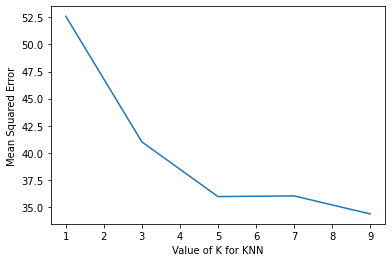

In [166]:
#Trying different values of K to see which give best results
k_range = range(1,10,2)
scores = []
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    knn_y_pred = knn.predict(X_test)
    scores.append(metrics.mean_squared_error(y_test, knn_y_pred))
#Testing the Accuracy for each K value from 1 to 9
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Mean Squared Error')
plt.show()


In [167]:
#trying the best value of K 
knn = KNeighborsRegressor(n_neighbors= 9)
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)

In [168]:
print(f'The R2 Score is : ', r2_score(y_test, knn_y_pred))
print(f'The Mean Absolute Error is : ', mean_absolute_error(y_test, knn_y_pred))
print(f'The Mean Squared Error is : ', mean_squared_error(y_test, knn_y_pred))
print(f'The Root Mean Squared Error is : ', np.sqrt(mean_squared_error(y_test, knn_y_pred)))

The R2 Score is :  0.23457461843110927
The Mean Absolute Error is :  4.771594936708861
The Mean Squared Error is :  34.37827024871074
The Root Mean Squared Error is :  5.8632985808937566


In [177]:
knn_error = np.sqrt(mean_squared_error(y_test, knn_y_pred))
knn_error

5.8632985808937566

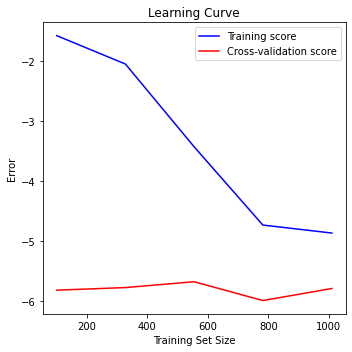

In [169]:
plot_learning_curve(knn, X, y)

**After feature Selection**

In [171]:
knn1 = KNeighborsRegressor()
knn1.fit(X_train_1, y_train_1)
knn1_y_pred1 = knn1.predict(X_test_1)

In [172]:
print(f'The R2 Score is : ', r2_score(y_test_1, knn1_y_pred1))
print(f'The Mean Absolute Error is : ', mean_absolute_error(y_test_1, knn1_y_pred1))
print(f'The Mean Squared Error is : ', mean_squared_error(y_test_1, knn1_y_pred1))
print(f'The Root Mean Squared Error is : ', np.sqrt(mean_squared_error(y_test_1, knn1_y_pred1)))

The R2 Score is :  0.5915054172312069
The Mean Absolute Error is :  3.2482830039525687
The Mean Squared Error is :  17.537397449011852
The Root Mean Squared Error is :  4.187767597301915


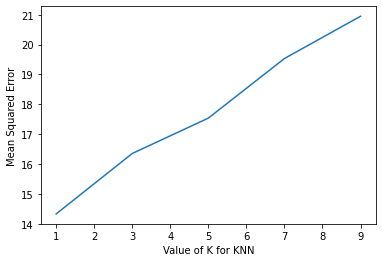

In [173]:
k_range = range(1,10,2)
scores = []
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    knn.fit(X_train_1, y_train_1)
    knn_y_pred1 = knn.predict(X_test_1)
    scores.append(metrics.mean_squared_error(y_test_1, knn_y_pred1))
#Testing the Accuracy for each K value from 1 to 9
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Mean Squared Error')
plt.show()


In [188]:
#trying the best value of K 
knn1 = KNeighborsRegressor(n_neighbors= 1)
knn1.fit(X_train_1, y_train_1)
knn_y_pred1 = knn1.predict(X_test_1)

In [189]:
print(f'The R2 Score is : ', r2_score(y_test_1, knn_y_pred1))
print(f'The Mean Absolute Error is : ', mean_absolute_error(y_test_1, knn_y_pred1))
print(f'The Mean Squared Error is : ', mean_squared_error(y_test_1, knn_y_pred1))
print(f'The Root Mean Squared Error is : ', np.sqrt(mean_squared_error(y_test_1, knn_y_pred1)))

The R2 Score is :  0.6662436622859189
The Mean Absolute Error is :  2.7114703557312247
The Mean Squared Error is :  14.328751940711461
The Root Mean Squared Error is :  3.7853337951508927


In [190]:
knn1_error = np.sqrt(mean_squared_error(y_test_1, knn_y_pred1))
knn1_error

3.7853337951508927

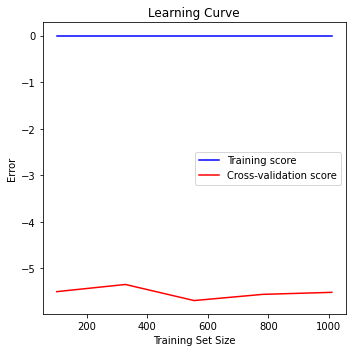

In [191]:
plot_learning_curve(knn1, X1, y1)

## Model Evaluation

**Before Feature Selection**

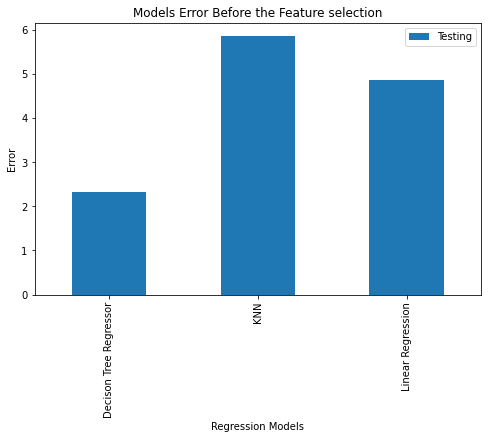

In [192]:
plotdata = pd.DataFrame({

    "Testing":[tree_error,knn_error,reg_error]},
    
    index=["Decison Tree Regressor", "KNN", "Linear Regression"])


plotdata.plot(kind="bar",figsize=(8, 5))

plt.title("Models Error Before the Feature selection")
plt.xlabel("Regression Models")
plt.ylabel("Error")
plt.show()


**After Feature Selection**

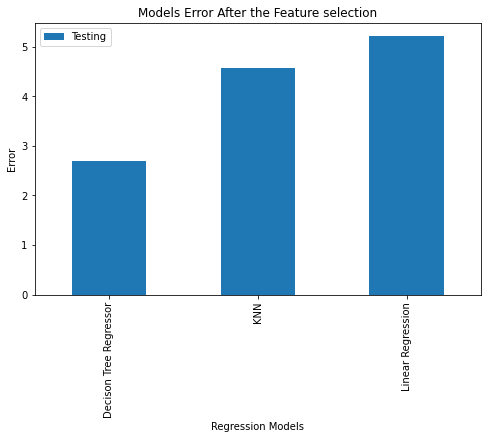

In [187]:
plotdata = pd.DataFrame({

    "Testing":[tree1_error,knn1_error,reg1_error]},
    
    index=["Decison Tree Regressor", "KNN", "Linear Regression"])


plotdata.plot(kind="bar",figsize=(8, 5))

plt.title("Models Error After the Feature selection")
plt.xlabel("Regression Models")
plt.ylabel("Error")
plt.show()